# 15.000 Músicas - 19 Gêneros (com Dados do Spotify)

Descrição do conjunto de dados: O conjunto de dados é uma coleção abrangente de 15.150 clássicos de 3.083 artistas, abrangendo um século de história da música de 1923 a 2023. Esse conjunto de dados diversificado está dividido em 19 gêneros distintos, mostrando a evolução da música popular ao longo de diferentes épocas e estilos. Cada faixa do conjunto de dados é enriquecida com recursos de áudio do Spotify, oferecendo insights detalhados sobre as propriedades acústicas, ritmo, tempo e outras características musicais.

Variáveis:

* Track	(Faixa) -	Nome da música
* Artist	(Artista) -	Nome do artista ou banda
* Year	(Ano) -	Ano de lançamento da música
* Duration (Duração) -	Duração da música em milissegundos
* Time_Signature	(Compasso) -	Compasso musical da música (ex: 4/4)
* Danceability	(Dançabilidade) -	Medida de quão adequada a música é para dançar (de 0 a 1)
* Energy	(Energia) -	Medida da intensidade e atividade da música (de 0 a 1)
* Key	(Tom) -	Tom da música (ex: 0=C)
* Loudness	(Volume) -	Volume geral da música em decibéis (dB)
* Mode	(Modo) -	Modalidade da música (maior ou menor)
* Speechiness	(Falado) -	Medida da presença de palavras faladas na música (de 0 a 1)
* Acousticness	(Acústica) -	Medida de quão acústica a música é (de 0 a 1)
* Instrumentalness	(Instrumental) -	Medida da probabilidade da música ser instrumental (de 0 a 1)
* Liveness	(Ao Vivo) -	Medida da presença de público ao vivo na gravação (de 0 a 1)
* Valence	(Valência) -	Medida da positividade da música (de 0 a 1)
* Tempo	(Tempo) -	Velocidade da música em batidas por minuto (BPM)
* Popularity	(Popularidade) -	Medida da popularidade da música (de 0 a 100)
* Genre	(Gênero) -	Gênero musicalnero) - Gênero musical

# Conhecendo os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
# Leitura dos dados
dados = pd.read_csv('../input/10400-classic-hits-10-genres-1923-to-2023/ClassicHit.csv')

In [3]:
# Informações dos dados coletados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [4]:
dados.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [5]:
# Contar o número de linhas duplicadas

duplicadas = dados.duplicated()
print("Número de linhas duplicadas:", duplicadas.sum())

Número de linhas duplicadas: 1


In [6]:
# Remover as linhas duplicadas:

dados = dados.drop_duplicates()

In [7]:
# Contar valores nulos em todas as colunas

valores_nulos = dados.isnull().sum()
print("Número de valores nulos por coluna:\n", valores_nulos)

Número de valores nulos por coluna:
 Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64


# Explorando os dados

In [8]:
# Agrupando por gênero e contando as ocorrências
genero_contagem = dados['Genre'].value_counts()
print(genero_contagem)

Genre
Pop          3669
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           699
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64


In [9]:
# Artistas mais populares
artist_mais_pop = dados.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
top_artist_mais_pop = artist_mais_pop.head(10)
print(top_artist_mais_pop)

Artist
Tierra                        92.0
Ronny & the Daytonas          92.0
Barenaked Ladies              91.0
Skylark                       90.0
Suzi Quatro & Chris Norman    90.0
a-ha                          88.0
Martha & the Vandellas        88.0
Jon B. featuring Babyface     87.0
SWV and Puff Daddy            87.0
Brandy and Monica             86.0
Name: Popularity, dtype: float64


In [10]:
# Artistas mais populares no gênero pop
artistas_pop = dados[dados['Genre'] == 'Pop'].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(artistas_pop.head(10))

Artist
Tierra                        92.0
Ronny & the Daytonas          92.0
Barenaked Ladies              91.0
Skylark                       90.0
Suzi Quatro & Chris Norman    90.0
a-ha                          88.0
Martha & the Vandellas        88.0
Jon B. featuring Babyface     87.0
SWV and Puff Daddy            87.0
Inez & Charlie Foxx           86.0
Name: Popularity, dtype: float64


In [11]:
# Contar o número de músicas por artista
artistas_com_mais_musicas = dados['Artist'].value_counts()

# Exibir os 10 artistas com mais músicas
print(artistas_com_mais_musicas.head(10))

Artist
Elton John            54
Michael Jackson       37
Bee Gees              36
The Rolling Stones    33
Chicago               32
Bob Dylan             31
Madonna               31
The Beatles           31
Deep Purple           30
Stevie Wonder         30
Name: count, dtype: int64


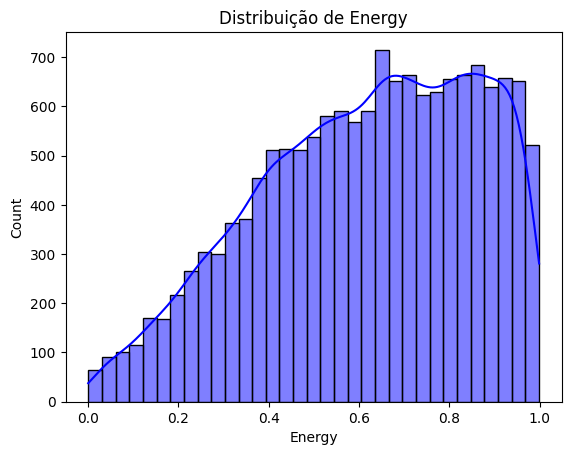

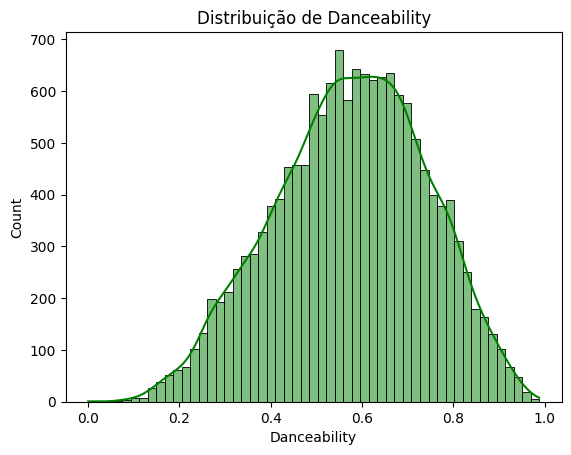

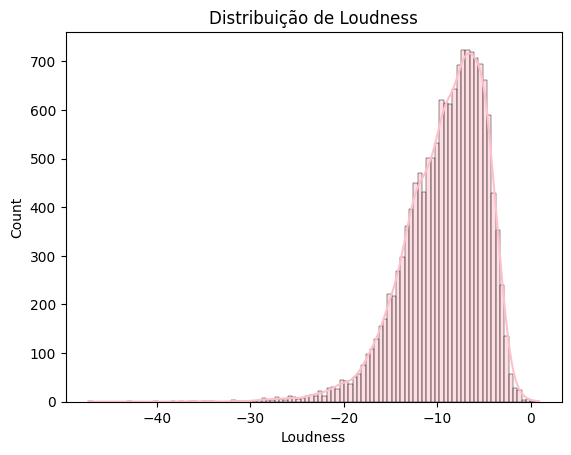

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Histograma

# Supondo que 'dados' seja seu DataFrame
sns.histplot(data=dados, x='Energy', kde=True, color='blue')
plt.title('Distribuição de Energy')
plt.show()

sns.histplot(data=dados, x='Danceability', kde=True, color='green')
plt.title('Distribuição de Danceability')
plt.show()

sns.histplot(data=dados, x='Loudness', kde=True, color='pink')
plt.title('Distribuição de Loudness')
plt.show()


# Aplicando modelos

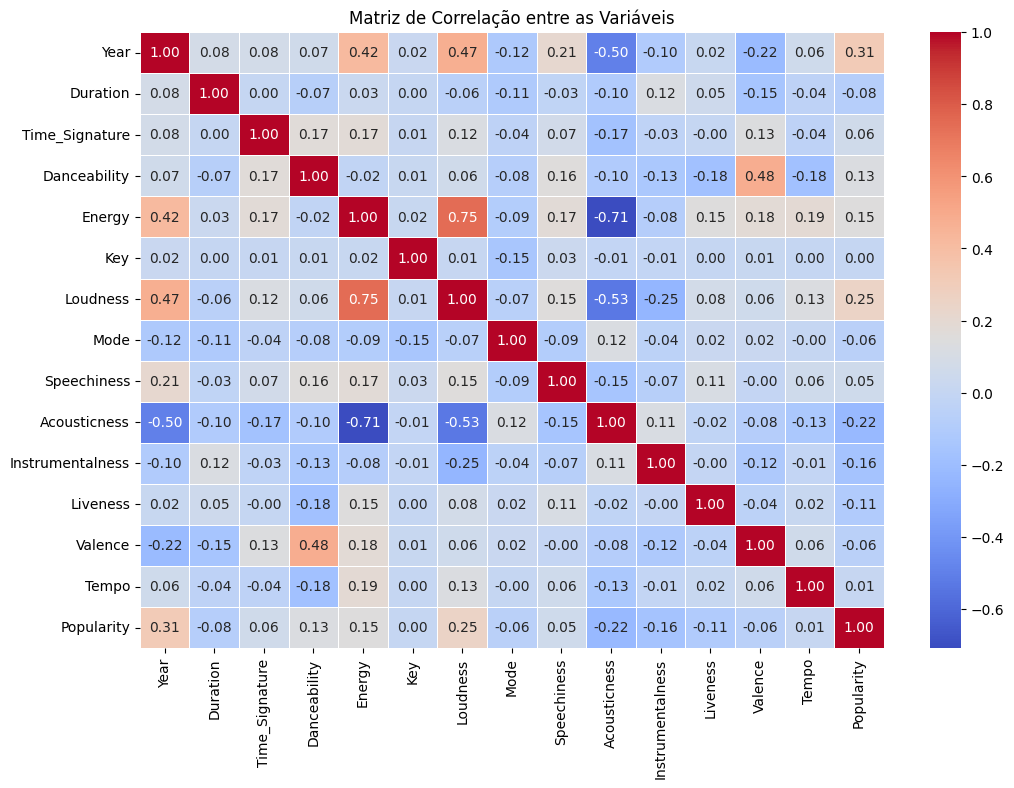

In [13]:
# Selecionar apenas colunas numéricas para calcular a correlação
dados_numericos = dados.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre todas as variáveis numéricas
correlacao = dados_numericos.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

A correlação entre Loudness e Energy é forte, com um valor de 0.746. Sugerindo que músicas mais energéticas tendem a ter um volume maior. E a relação entre Danceability e Valence sugere que músicas com uma valência positiva (mais alegres) são mais dançáveis.

In [14]:
print(dados.columns)


Index(['Track', 'Artist', 'Year', 'Duration', 'Time_Signature', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity',
       'Genre'],
      dtype='object')


# Árvore de Decisão

In [15]:
# Ajustar o nome da coluna alvo se necessário
coluna_alvo ='Loudness' 
# Criar os conjuntos de treino e teste
X = dados[['Energy', 'Danceability']]
y = dados['Loudness']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de árvore de decisão
clf =MLPRegressor(random_state=42)

# Treinar o modelo
clf.fit(X_train, y_train)

MLPRegressor(random_state=42)

In [16]:
# Definir as variáveis independentes (X) e dependente (y)
X = dados[['Energy', 'Danceability']]
y = dados['Loudness']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão
clf = MLPRegressor(random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

# Mostrar as primeiras previsões
print("Previsões:", y_pred[:10])

# Avaliar o modelo com métricas de desempenho
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinação (R²):", r2)

# Debug: Verificar as colunas de treino e teste
print("Colunas de treino:", X_train.columns)
print("Colunas de teste:", X_test.columns)

# Mostrar as primeiras linhas do conjunto de teste
print("Primeiras linhas de X_test:")
print(X_test.head())



Previsões: [ -7.95486375  -9.81744346  -8.78516292 -11.35259048  -8.36180356
  -6.92926195  -6.14572076  -7.79105414  -6.07256523 -14.78158706]
Coeficiente de determinação (R²): 0.5944417512748978
Colunas de treino: Index(['Energy', 'Danceability'], dtype='object')
Colunas de teste: Index(['Energy', 'Danceability'], dtype='object')
Primeiras linhas de X_test:
       Energy  Danceability
566     0.715         0.443
8618    0.517         0.701
8036    0.613         0.669
14772   0.404         0.750
6910    0.680         0.421


# Random Forest

Index(['Track', 'Artist', 'Year', 'Duration', 'Time_Signature', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity',
       'Genre'],
      dtype='object')


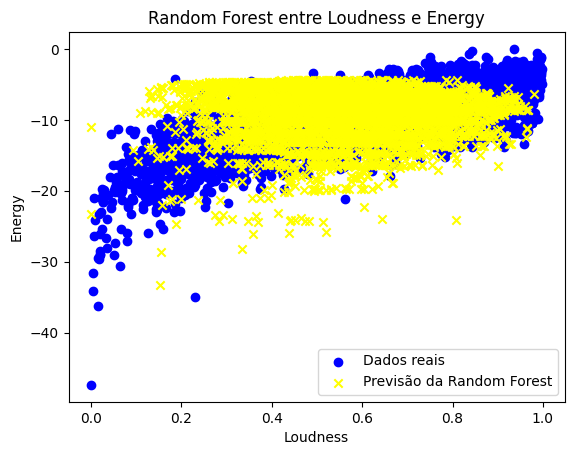

Erro quadrático médio (MSE) da Random Forest: 7.42


In [17]:
# Verificar as colunas do DataFrame
print(dados.columns)

# Ajustar o nome da coluna alvo se necessário
coluna_alvo = 'Loudness'
# Criar os conjuntos de treino e teste
X = dados[['Energy', 'Danceability']]
y = dados['Loudness' ] 

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir o modelo de Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Treinar o modelo
random_forest_regressor.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred_rf = random_forest_regressor.predict(X_test)

# Visualizar os dados reais e a previsão da Random Forest
plt.scatter(X_test['Energy'], y_test, color='blue', label='Dados reais')
plt.scatter(X_test['Danceability'], y_pred_rf, color='yellow', label='Previsão da Random Forest', marker='x')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Random Forest entre Loudness e Energy')
plt.legend()
plt.show()

# Avaliação do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Erro quadrático médio (MSE) da Random Forest: {mse_rf:.2f}")

